# **Live Class Pertemuan #15-16: Introduction to Air BnB Case**

Data Wrangling - Sekolah Data - Pacmann Academy

- AirBnB merupakan layanan online yang menyediakan jasa sewa rumah atau apartemen yang tersebar di berbagai penjuru dunia.
- Perusahaan ini memiliki data-data properti yang mereka sewakan

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png" alt="Drawing" width= 300;/>

[image source](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/2560px-Airbnb_Logo_B%C3%A9lo.svg.png)


# **BUSINESS CASE**

Dalam studi kasus kali ini kita akan melakukan analisis data untuk mencari informasi mengenai:
1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata jumlah review masing masing tipe property

import library

In [212]:
# library untuk analisis data
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# import library untuk ignore future warning
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)

In [213]:
# load dataset

# path data
path_data = "listings.csv"

# read data dari file 
listings = pd.read_csv(path_data) 

# menjadikan id sebagai index dalam satu baris
#listings = pd.read_csv(path_data, index_col='id') 

#menjadiakn id sebagai index
#listings = listings.set_index('id')

# tampilkan 5 data teratas
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.5 baths,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,3,3,30,30,3.0,30.0,NaN,t,0,0,0,53,2025-06-17,302,28,1,53,26,218,28776.0,2012-01-09,2025-06-11,4.92,4.90,4.94,4.95,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,1,2,730,730,2.0,730.0,NaN,t,1,2,4,130,2025-06-17,710,93,9,31,96,255,19890.0,2010-08-22,2025-06-16,4.88,4.90,4.87,4.94,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36584,4.89111,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", 

### Overview Dataset

Sebelum melakukan analisis kita akan mencari tahu informasi general mengenai datanya:

In [214]:
# set pandas max columns jumlah kolom dari data
pd.set_option('display.max_columns', len(listings.columns))
pd.set_option('display.max_rows', 101)

# menampilkan 100 data teratas 
listings.head(101)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.387610,4.891880,Private room in houseboat,Private room,2,1.5,1.5 baths,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,3,3,30,30,3.0,30.0,NaN,t,0,0,0,53,2025-06-17,302,28,1,53,26,218,28776.0,2012-01-09,2025-06-11,4.92,4.90,4.94,4.95,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.367750,4.890920,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,1,2,730,730,2.0,730.0,NaN,t,1,2,4,130,2025-06-17,710,93,9,31,96,255,19890.0,2010-08-22,2025-06-16,4.88,4.90,4.87,4.94,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/9986b...,https://a0.muscache.com/im/pictures/user/9986b...,Amsterdam Centrum,2.0,2.0,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.365840,4.891110,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Wi

In [215]:
# dimensi dataset 
row, columns = listings.shape

print(f"listings terdiri atas : {row} baris dan {columns} kolom")

listings terdiri atas : 10168 baris dan 79 kolom


In [216]:
# dataset info 
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10168 non-null  int64  
 1   listing_url                                   10168 non-null  object 
 2   scrape_id                                     10168 non-null  int64  
 3   last_scraped                                  10168 non-null  object 
 4   source                                        10168 non-null  object 
 5   name                                          10168 non-null  object 
 6   description                                   9859 non-null   object 
 7   neighborhood_overview                         5258 non-null   object 
 8   picture_url                                   10168 non-null  object 
 9   host_id                                       10168 non-null 

In [217]:
# melihat statistik data
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.016800e+04,1.016800e+04,1.016800e+04,10164.000000,10164.000000,0.0,10168.000000,10168.000000,10168.000000,6377.000000,9874.000000,6341.000000,10168.000000,10168.000000,10168.000000,10168.000000,1.016800e+04,1.016800e+04,10168.000000,1.016800e+04,0.0,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,6.321000e+03,9198.000000,9198.000000,9197.000000,9198.000000,9198.000000,9198.000000,9198.000000,10168.000000,10168.000000,10168.000000,10168.000000,9198.000000
mean,5.495778e+17,2.025061e+13,1.302961e+08,3.524105,5.403680,NaN,52.366657,4.889542,2.926928,1.250039,1.557322,1.841981,4.129622,289.781963,3.710366,4.758163,4.227708e+05,4.227936e+05,4.151465,4.227842e+05,NaN,5.806058,14.156471,22.189418,91.035012,47.568843,8.967840,0.759638,49.949548,8.634048,51.165519,1.628915e+04,4.844651,4.855278,4.779614,4.893529,4.907673,4.813358,4.655034,1.852085,1.208694,0.575138,0.033733,0.982216
std,5.381949e+17,0.000000e+00,1.737325e+08,30.578664,55.067867,NaN,0.017125,0.035242,1.292811,0.537645,0.893615,1.625684,17.267562,393.391805,16.161718,18.869662,3.011658e+07,3.011658e+07,16.403349,3.011658e+07,NaN,8.761619,18.618628,28.685512,116.066009,128.113760,25.076334,2.101968,64.496009,24.464155,77.676604,4.915380e+04,0.250759,0.242731,0.311448,0.213664,0.213848,0.237086,0.316570,3.343481,2.512860,1.770011,0.473912,2.112976
min,2.788600e+04,2.025061e+13,1.662000e+03,1.000000,1.000000,NaN,52.290276,4.755870,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.475968e+07,2.025061e+13,1.269467e+07,1.000000,1.000000,NaN,52.355668,4.864550,2.000000,1.000000,1.000000,1.000000,2.000000,20.000000,2.000000,2.000000,2.100000e+01,2.100000e+01,2.000000,2.100000e+01,NaN,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.088000e+03,4.790000,4.800000,4.690000,4.860000,4.900000,4.720000,4.520000,1.000000,1.000000,0.000000,0.000000,0.200000
50%,6.545968e+17,2.025061e+13,4.442366e+07,1.000000,1.000000,NaN,52.365525,4.887365,2.000000,1.000000,1.000000,1.000000,3.000000,30.000000,2.000000,3.000000,3.500000e+01,7.250000e+01,3.000000,6.000000e+01,NaN,0.000000,4.000000,8.000000,26.000000,10.000000,2.000000,0.000000,14.000000,2.000000,16.000000,7.560000e+03,4.920000,4.920000,4.870000,4.970000,5.000000,4.880000,4.710000,1.000000,1.000000,0.000000,0.000000,0.410000
75%,1.053090e+18,2.025061e+13,1.829336e+08,1.000000,2.000000,NaN,52.376452,4.908866,4.000000,1.500000,2.000000,2.000000,4.000000,365.000000,3.000000,4.000000,7.300000e+02,9.990000e+02,4.000000,8.457250e+02,NaN,9.000000,23.000000,38.000000,167.000000,31.000000,6.000000,1.000000,90.000000,6.000000,55.000000,2.021200e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.850000,1.000000,1.000000,0.000000,0.000000,0.9200

In [218]:
# melihat statistik data fitur kategorikal
listings.describe(include='object')

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,10168,10168,10168,10168,9859,5258,10168,10168,10164,10164,9024,5372,6640,6640,7937,10069,10164,10164,2814,10164,10164,10164,5258,10168,10168,10168,10162,10168,6321,9849,10168,9198,9198,10062,10168
unique,10168,1,2,9885,9528,4882,10078,8930,3792,3523,205,4440,4,54,101,2,8792,8792,77,7,2,2,40,22,65,4,24,9780,677,1,1,2915,1357,8846,2
top,https://www.airbnb.com/rooms/27886,2025-06-17,city scrape,Appartement in Amsterdam,From this charming accommodation located in th...,Traditionally a blue collar neighbourhood just...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/39110511,Mike,2015-07-21,"Amsterdam, Netherlands",Numa is Europe’s premier provider of digitally...,within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Oud-West,"['email', 'phone']",t,t,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""TV"", ""Kitchen"", ""Smoke ala...",$180.00,t,2025-06-17,2025-01-02,2025-06-01,Exempt,f
freq,1,10168,6377,18,12,16,9,39,52,46,8266,49,3242,5268,2676,8348,142,142,540,8184,10022,9822,4392,1763,4334,8263,5239,16,129,9849,10168,37,366,743,8627


In [219]:
listings.loc[:, ["calendar_updated", "neighbourhood_group_cleansed"]]

,calendar_updated,neighbourhood_group_cleansed
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
10163,NaN,NaN
10164,NaN,NaN
10165,NaN,NaN
10166,NaN,NaN


## Data Processing and Cleaning

### 1. Get relevan data

Dalam kasus kali ini, tidak semua data didalam dataset dibutuhkan. Untuk menghemat waktu dan meng-efektifkan proses pengolahan, kita akan mengakses kolom-kolom yang dibutuhkan dalam kasus kali ini. Kolom tersebut antara lain:

    - host_since - date that the host first joined Airbnb
    - host_response_time - average amount of time the host takes to reply to messages
    - host_response_rate - proportion of messages that the host replies to
    - property_type - type of property, e.g. house or flat
    - accommodates - how many people the property accommodates
    - bathrooms - number of bathrooms
    - bedrooms - number of bedrooms
    - price - nightly advertised price (the target variable)
    - number_of_reviews - the number of reviews left for the property

Selain kita akan mengambil informasi tambahan berupa id dan nama dari host

In [220]:
import copy

In [221]:
# daftar kolom yang akan di drop
columns_to_be_used = ["id",
                      "host_name", 
                      "host_since", 
                      "host_response_time", 
                      "host_response_rate", 
                      "property_type", 
                      "accommodates", 
                      "bathrooms", 
                      "bedrooms", 
                      "price", 
                      "number_of_reviews"]

# filter data
listings = listings.copy() # copy agar data tidak bertimpangan
listings_filtered = listings[columns_to_be_used]

# menampilkan dimensi dataframe
listings_filtered.head()

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,27886,Flip,2010-03-23,within an hour,100%,Private room in houseboat,2,1.5,1.0,$132.00,302
1,28871,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,2,1.0,1.0,$78.00,710
2,29051,Edwin,2010-05-13,within an hour,100%,Private room in condo,2,1.0,1.0,$70.00,822
3,44391,Jan,2010-08-08,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,42
4,47061,Ivar,2010-08-24,within a few hours,100%,Entire rental unit,3,1.5,2.0,$120.00,203


In [222]:
# info dataset fitur kategorikal
listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10168 non-null  int64  
 1   host_name           10164 non-null  object 
 2   host_since          10164 non-null  object 
 3   host_response_time  6640 non-null   object 
 4   host_response_rate  6640 non-null   object 
 5   property_type       10168 non-null  object 
 6   accommodates        10168 non-null  int64  
 7   bathrooms           6377 non-null   float64
 8   bedrooms            9874 non-null   float64
 9   price               6321 non-null   object 
 10  number_of_reviews   10168 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 873.9+ KB


Dari informasi diatas terlihat bebapa kolom tidak sesuai antara representasi dan tipe data dari kolom tersebut. Kolom-kolom tersebut antara lain:
- host_since: data tanggal yang bertipe object
- host_response_rate: data persentase yang bertipe object
- price: data harga yang bertipe object

Kita akan menangani permasalahan ini terlebih dahulu di section berikutnya.

### 2. Cek dan Handle Tipe Kolom yang tidak sesuai dengan representasi data

Dari hasil pengecekan sebelumnya diketahui beberapa kolom tidak sesuai antara representasi datanya dan tipe data dari kolom tersebut. Kolom tersebut yaitu:
- host_since: data tanggal yang bertipe object
- host_response_rate: data persentase yang bertipe object
- price: data harga yang bertipe object

#### 2.1 Menangani kolom host_since

Karena kolom ini merepresentasikan tipe data tanggal, maka kita akan melakukan parsing terhadap data tanggal tersebut.

In [223]:
# cek data pada kolom
listings_filtered.host_since.head()

0    2010-03-23
1    2010-05-13
2    2010-05-13
3    2010-08-08
4    2010-08-24
Name: host_since, dtype: object

Karena pada data tanggal ini, diawali dengan tahun maka kita akan mengubah nilai dari parameter yearfirst pada fungsi to_datetime

2 cara convert pandas ke tanggal 
- datetime
- astype

In [224]:
# convert kolom host_since
listings_filtered.loc[:, 'host_since'] = pd.to_datetime(listings_filtered.host_since, yearfirst=True)
# listings_filtered.host_since.astype('datetime')  ( jika kita menggunakan astype )


# tampilkan data tanggal setelah diconvert
listings_filtered.host_since

0        2010-03-23 00:00:00
1        2010-05-13 00:00:00
2        2010-05-13 00:00:00
3        2010-08-08 00:00:00
4        2010-08-24 00:00:00
                ...         
10163    2025-06-06 00:00:00
10164    2013-06-29 00:00:00
10165    2016-02-10 00:00:00
10166    2024-05-06 00:00:00
10167    2022-03-16 00:00:00
Name: host_since, Length: 10168, dtype: object

In [227]:
datetime_regex = listings_filtered.host_since.str.extract(r"(\d{2}:\d{2}:\d{2})")

AttributeError: Can only use .str accessor with string values!

Kita telah berhasil mengubah tipe data tanggal menjadi datetime

#### 2.2 Menangani kolom host_response_rate

Kolom ini merepresentasikan persentase respon dari host. Kita akan mengubah kolom ini sehingga memiliki tipe numerik dan menambahkan keterangan pada nama kolom untuk memperjelas persentase dari kolom tersebut.

In [ ]:
# cek data pada kolom host_response_rate
listings_filtered.host_response_rate.head()

0    100%
1    100%
2    100%
3     NaN
4    100%
Name: host_response_rate, dtype: object

Dari informasi diatas:
- Setiap data harga diawali dengan simbol $
- Untuk harga yang mencapai ribuan, satuannya menggunakan tanda koma.

Agar bisa diconvert menjadi data numerik kita akan menghilangkan kedua tanda tersebut.

In [ ]:
# menghapus tanda percent
listings_filtered.loc[:, 'host_response_rate']  = listings_filtered.host_response_rate.str.replace('%', "")
listings_filtered.host_response_rate

0        100
1        100
2        100
3        NaN
4        100
        ... 
10163    NaN
10164    NaN
10165    NaN
10166     80
10167     94
Name: host_response_rate, Length: 10168, dtype: object

In [ ]:
# melihat dimana letak missing values
listings_filtered.host_response_rate[listings_filtered.host_response_rate.isna()]

3        NaN
5        NaN
8        NaN
10       NaN
11       NaN
        ... 
10161    NaN
10162    NaN
10163    NaN
10164    NaN
10165    NaN
Name: host_response_rate, Length: 3528, dtype: object

In [ ]:
# mengconvert tipe menjadi int
#listings_filtered.loc[:, 'host_response_rate'] = listings_filtered.host_response_rate.astype(int)

#listings_filtered.host_response_rate

Terlihat kita tidak dapat langsung menconvert kolom tersebut menjadi bertipe integer karena terdapat missing values. Untuk mengatasinya, untuk sementara kita akan mengubah NaN menjadi nilai -1 kemudian menconvert tipe data menjadi int. Setelah itu kita akan mengembalikan nilai -1 menjadi NaN

In [ ]:
# mengisi NaN dengan nilai -1
listings_filtered.host_response_rate.fillna(-1, inplace=True)

# mengubah tipe data menjadi int
listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)

# mengembalikan -1 menjadi NaN
listings_filtered.host_response_rate.replace(-1, np.nan,  inplace=True)

# menampilkan data host_response_rate
listings_filtered.host_response_rate

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_3420\3498668810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate.fillna(-1, inplace=True)
C:\Users\ghatfan\AppData\Local\Temp\ipykernel_3420\3498668810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)
C:\Users\ghatfan\AppData\Local\Temp\ipykernel_3420\3498668810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

0        100.0
1        100.0
2        100.0
3          NaN
4        100.0
         ...  
10163      NaN
10164      NaN
10165      NaN
10166     80.0
10167     94.0
Name: host_response_rate, Length: 10168, dtype: float64

In [ ]:
# mengubah nama kolom sehingga representatif
listings_filtered = listings_filtered.rename(columns = {'host_response_rate' : 'percent_host_rate'})
listings_filtered.percent_host_rate

0        100.0
1        100.0
2        100.0
3          NaN
4        100.0
         ...  
10163      NaN
10164      NaN
10165      NaN
10166     80.0
10167     94.0
Name: percent_host_rate, Length: 10168, dtype: float64

#### 2.3 Menangani kolom price

Kolom price merepresentasikan harga sewa dari properti tersebut. Data ini seharusnya bertipe numerik. Kita akan mengubah kolom ini sehingga bertipe numerik.

In [ ]:
# cek data pada kolom price
listings_filtered.price

0        $132.00
1         $78.00
2         $70.00
3            NaN
4        $120.00
          ...   
10163    $258.00
10164    $350.00
10165    $263.00
10166    $300.00
10167    $149.00
Name: price, Length: 10168, dtype: object

In [ ]:
# data unik pada kolom price
listings_filtered.price.unique()

array(['$132.00', '$78.00', '$70.00', nan, '$120.00', '$284.00',
       '$457.00', '$198.00', '$139.00', '$200.00', '$59.00', '$407.00',
       '$279.00', '$265.00', '$63.00', '$248.00', '$203.00', '$158.00',
       '$237.00', '$267.00', '$687.00', '$116.00', '$180.00', '$179.00',
       '$450.00', '$1,036.00', '$188.00', '$169.00', '$854.00', '$133.00',
       '$325.00', '$136.00', '$245.00', '$299.00', '$190.00', '$580.00',
       '$150.00', '$123.00', '$241.00', '$170.00', '$157.00', '$60.00',
       '$355.00', '$250.00', '$630.00', '$500.00', '$215.00', '$210.00',
       '$175.00', '$350.00', '$225.00', '$125.00', '$101.00', '$315.00',
       '$69.00', '$86.00', '$138.00', '$143.00', '$340.00', '$283.00',
       '$318.00', '$156.00', '$124.00', '$80.00', '$249.00', '$152.00',
       '$166.00', '$148.00', '$395.00', '$87.00', '$100.00', '$160.00',
       '$233.00', '$187.00', '$476.00', '$386.00', '$129.00', '$300.00',
       '$72.00', '$294.00', '$122.00', '$130.00', '$499.00', '$1

Dari informasi diatas:
- Setiap data harga diawali dengan simbol $
- Untuk harga yang mencapai ribuan, satuannya menggunakan tanda koma.

Agar bisa diconvert menjadi data numerik kita akan menghilangkan kedua tanda tersebut.

In [ ]:
# menghilangkan tanda $ dan koma
listings_filtered.price = listings_filtered.price.str.replace("$", "")
listings_filtered.price = listings_filtered.price.str.replace(",", "")

# mengubah kolom sehingga bertipe float 
listings_filtered.price = listings_filtered.price.astype("float")

# menampilkan data price
listings_filtered.price

0        132.0
1         78.0
2         70.0
3          NaN
4        120.0
         ...  
10163    258.0
10164    350.0
10165    263.0
10166    300.0
10167    149.0
Name: price, Length: 10168, dtype: float64

### 3. Handle Missing Values

Pada tahapan ini kita akan melakukan pengecekan jumlah missing values yang ada di tiap kolom dan menentukan, metode apa yang akan digunakan untuk menangani missing values.

In [ ]:
# menetukan jumlah missing value tiap kolom
# dan mengurutukan dari yang terbesar ke terkecil
nan_col = listings_filtered.isna().sum().sort_values(ascending=False)
nan_col

price                 3847
bathrooms             3791
host_response_time    3528
percent_host_rate     3528
bedrooms               294
host_name                4
host_since               4
id                       0
property_type            0
accommodates             0
number_of_reviews        0
dtype: int64

In [ ]:
# mendaptkan presentase missing values tiap kolom
n_data = len(listings)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

price                 37.834382
bathrooms             37.283635
host_response_time    34.697089
percent_host_rate     34.697089
bedrooms               2.891424
host_name              0.039339
host_since             0.039339
id                     0.000000
property_type          0.000000
accommodates           0.000000
number_of_reviews      0.000000
dtype: float64

Pertama kita akan menghapus kolom yang persentase missing valuesnya diatas 90%

In [ ]:
# buat dalam bentuk dataframe 
columns_contain_nan = pd.DataFrame(percent_nan_col[percent_nan_col > 0],
                                   columns = ["%nan"]) # mencari columns yang mengandung missing values

columns_contain_nan

,%nan
price,37.834382
bathrooms,37.283635
host_response_time,34.697089
percent_host_rate,34.697089
bedrooms,2.891424
host_name,0.039339
host_since,0.039339


In [ ]:
# cari kolom yang presentase missing valuesnya lebih dari 90%
nan_col_abv99 = percent_nan_col[percent_nan_col > 90].index
nan_col_abv99

Index([], dtype='object')

jika ada yang diatas 90% maka langsung di drop

In [ ]:
listings_filtered.price.unique()

array([1.3200e+02, 7.8000e+01, 7.0000e+01,        nan, 1.2000e+02,
       2.8400e+02, 4.5700e+02, 1.9800e+02, 1.3900e+02, 2.0000e+02,
       5.9000e+01, 4.0700e+02, 2.7900e+02, 2.6500e+02, 6.3000e+01,
       2.4800e+02, 2.0300e+02, 1.5800e+02, 2.3700e+02, 2.6700e+02,
       6.8700e+02, 1.1600e+02, 1.8000e+02, 1.7900e+02, 4.5000e+02,
       1.0360e+03, 1.8800e+02, 1.6900e+02, 8.5400e+02, 1.3300e+02,
       3.2500e+02, 1.3600e+02, 2.4500e+02, 2.9900e+02, 1.9000e+02,
       5.8000e+02, 1.5000e+02, 1.2300e+02, 2.4100e+02, 1.7000e+02,
       1.5700e+02, 6.0000e+01, 3.5500e+02, 2.5000e+02, 6.3000e+02,
       5.0000e+02, 2.1500e+02, 2.1000e+02, 1.7500e+02, 3.5000e+02,
       2.2500e+02, 1.2500e+02, 1.0100e+02, 3.1500e+02, 6.9000e+01,
       8.6000e+01, 1.3800e+02, 1.4300e+02, 3.4000e+02, 2.8300e+02,
       3.1800e+02, 1.5600e+02, 1.2400e+02, 8.0000e+01, 2.4900e+02,
       1.5200e+02, 1.6600e+02, 1.4800e+02, 3.9500e+02, 8.7000e+01,
       1.0000e+02, 1.6000e+02, 2.3300e+02, 1.8700e+02, 4.7600e

In [ ]:
listings_filtered[listings_filtered['price'].isna()]

,id,host_name,host_since,host_response_time,percent_host_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
3,44391,Jan,2010-08-08 00:00:00,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,42
5,48373,Vesna & Misha,2010-09-01 00:00:00,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,5
10,53921,Ingrid,2010-10-03 00:00:00,NaN,NaN,Entire rental unit,3,NaN,1.0,NaN,12
11,55709,Jan-Willem,2010-10-16 00:00:00,NaN,NaN,Entire loft,2,NaN,1.0,NaN,69
12,55868,Cornelie,2010-10-17 00:00:00,NaN,NaN,Entire condo,4,NaN,2.0,NaN,96
...,...,...,...,...,...,...,...,...,...,...,...
9972,1408593696645916644,Brecht,2018-08-07 00:00:00,within a day,100.0,Entire rental unit,2,NaN,1.0,NaN,1
9976,1409160715053192072,Willem,2014-07-03 00:00:00,within an hour,100.0,Entire townhouse,4,NaN,3.0,NaN,0
9979,1409362095247165318,Dana,2016-01-07 00:00:00,within an hour,100.0,Entire rental unit,4,NaN,3.0,NaN,0
9986,1410255655855031173,Anna Sophie,2015-04-30 00:00:00,NaN,NaN,Houseboat,2,NaN,1.0,NaN,0


In [ ]:
# 5 data teratas yang memiliki NaN
listings_filtered[["price", "bathrooms", "host_response_time", "bedrooms"]].head()

,price,bathrooms,host_response_time,bedrooms
0,132.0,1.5,within an hour,1.0
1,78.0,1.0,within an hour,1.0
2,70.0,1.0,within an hour,1.0
3,NaN,NaN,NaN,2.0
4,120.0,1.5,within a few hours,2.0


In [ ]:
# melihat nilai unique nya
listings_filtered.host_response_time.unique()

array(['within an hour', nan, 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [ ]:
# melihat missing 
listings_filtered[listings_filtered['host_response_time'].isna()]

,id,host_name,host_since,host_response_time,percent_host_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
3,44391,Jan,2010-08-08 00:00:00,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,42
5,48373,Vesna & Misha,2010-09-01 00:00:00,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,5
8,50515,Karin,2010-09-12 00:00:00,NaN,NaN,Entire townhouse,5,1.5,3.0,198.0,18
10,53921,Ingrid,2010-10-03 00:00:00,NaN,NaN,Entire rental unit,3,NaN,1.0,NaN,12
11,55709,Jan-Willem,2010-10-16 00:00:00,NaN,NaN,Entire loft,2,NaN,1.0,NaN,69
...,...,...,...,...,...,...,...,...,...,...,...
10161,1436827070629213780,Erik,2016-07-06 00:00:00,NaN,NaN,Private room in rental unit,2,1.5,1.0,98.0,0
10162,1436896258262505737,Jacqueline,2011-02-18 00:00:00,NaN,NaN,Entire rental unit,3,1.5,2.0,194.0,0
10163,1437492870456891135,Mirte Renée,2025-06-06 00:00:00,NaN,NaN,Entire rental unit,4,1.0,3.0,258.0,0
10164,1437585511300942515,Willemijn,2013-06-29 00:00:00,NaN,NaN,Entire home,4,1.5,2.0,350.0,0


<Axes: xlabel='price', ylabel='Count'>

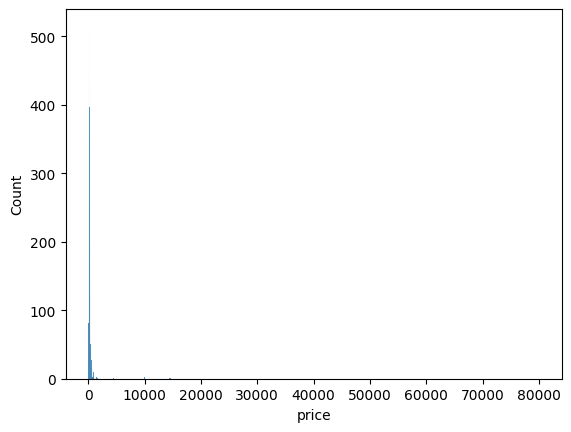

In [ ]:
# melihat distibusi kolom price
sns.histplot(data=listings_filtered, x = "price")

In [ ]:
# menggunakan median untuk menangani missing values
median_price = listings_filtered.price.median()

# menginput kolom NaN dengan median
listings_filtered.price.fillna(median_price, inplace=True)

<Axes: xlabel='bathrooms', ylabel='Count'>

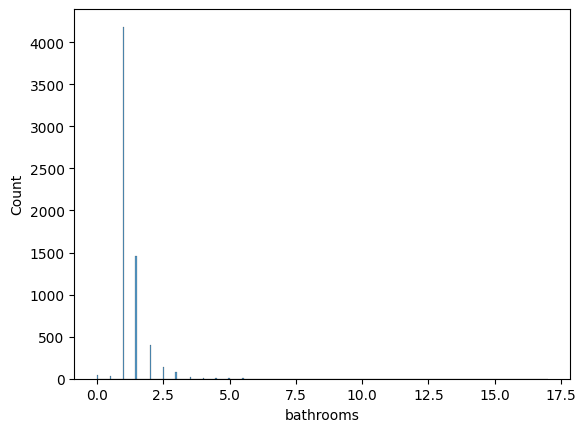

In [ ]:
# melihat distribusi bathrooms
sns.histplot(data= listings_filtered, x="bathrooms")

In [ ]:
# mendapatkan modus dari host_response_time
modus_bathrooms = listings_filtered.bathrooms.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.bathrooms.fillna(modus_bathrooms, inplace = True)

In [ ]:
# 5 data teratas yang memiliki NaN
listings_filtered[["price", "bathrooms", "host_response_time", "bedrooms"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               10168 non-null  float64
 1   bathrooms           10168 non-null  float64
 2   host_response_time  6640 non-null   object 
 3   bedrooms            9874 non-null   float64
dtypes: float64(3), object(1)
memory usage: 317.9+ KB


- Karena host_response_time dan bedrooms bertipe kategorik dan numeric diskrit maka kita akan menginput nan dengan nilai modusnya.
- Pada kolom percent_host_response_rate kita akan menginput dengan nilai mean atau mediannya.

In [ ]:
# data unik kolom host_response_time
data_unik_bedrooms = listings_filtered['host_response_time'].unique()
print(f"data unik kolom host_response_time : {data_unik_bedrooms}")

# membuat spasi
print("")

# frekuensi dari masing-masing data di kolom host_resposne_time
print("frekuensi dari masing-masing nilai:")
print(listings_filtered['host_response_time'].value_counts())

data unik kolom host_response_time : ['within an hour' nan 'within a few hours' 'within a day'
 'a few days or more']

frekuensi dari masing-masing nilai:
host_response_time
within an hour        3242
within a few hours    1653
within a day          1485
a few days or more     260
Name: count, dtype: int64


In [ ]:
# data unik kolom bedrooms
data_unik_bedrooms = listings_filtered['bedrooms'].unique()
print(f"data unik kolom host_response_time : {data_unik_bedrooms}")

# membuat spasi
print("")

# frekuensi dari masing-masing data di kolom host_resposne_time
print("frekuensi dari masing-masing nilai:")
print(listings_filtered['bedrooms'].value_counts())

data unik kolom host_response_time : [ 1.  2.  3. nan  5. 10.  4.  0.  8.  6.  7. 17.]

frekuensi dari masing-masing nilai:
bedrooms
1.0     5827
2.0     2532
3.0      979
4.0      301
0.0      176
5.0       43
6.0        6
8.0        5
10.0       3
7.0        1
17.0       1
Name: count, dtype: int64


Kita akan menginput nan pada kedua kolom tersebut menggunakan nilai modusnya.

In [ ]:
# mendapatkan modus dari host_response_time
modus_host_response_time = listings_filtered.host_response_time.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.host_response_time.fillna(modus_host_response_time, inplace = True)

In [ ]:
# mendapatkan modus dari bedrooms
modus_bedrooms = listings_filtered.bedrooms.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.bedrooms.fillna(modus_bedrooms, inplace=True)

Cek distribusi dari kolom percent_host_response_rate  

<Axes: xlabel='percent_host_rate', ylabel='Count'>

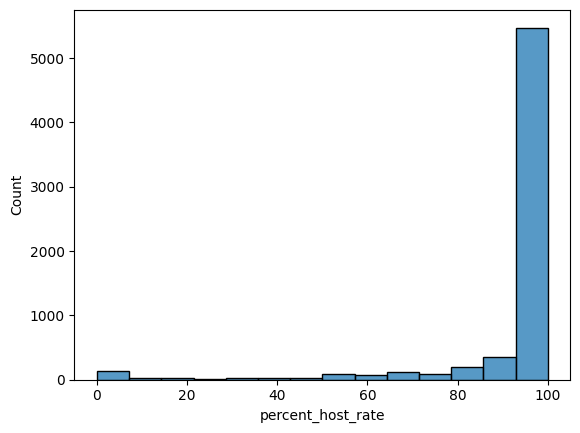

In [ ]:
# distribusi kolom percent_host_responsd_rate
sns.histplot(data = listings_filtered, x = "percent_host_rate")

Karena distribusinya tidak normal, kita akan menggunakan median untuk menginput missing values pada kolom percent_host_response_rate

In [ ]:
# mencari median kolom percent_host_response_rate
median_percent_host_response_rate = listings_filtered.percent_host_rate.median()

# menginput NaN dengan median
listings_filtered.percent_host_rate.fillna(median_percent_host_response_rate, inplace=True)

Kita akan melakukan pengecekan kembali missing values pada data, untuk memastikan semua missing values sudah ditangani

In [ ]:
# cek jumlah missing values
listings_filtered.isna().sum()

id                    0
host_name             4
host_since            4
host_response_time    0
percent_host_rate     0
property_type         0
accommodates          0
bathrooms             0
bedrooms              0
price                 0
number_of_reviews     0
dtype: int64

Semua missing values sudah teratasi.

### 4. Pengecekan Duplikat

In [ ]:
listings_filtered[listings_filtered.duplicated()]

,id,host_name,host_since,host_response_time,percent_host_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews


Terlihat dataset ini tidak memiliki data duplikat

### 5. Pengecekan Konsistensi

Kita akan melakukan pengecekan konsistensi penulisan pada kolom-kolom kategori. Kali ini kita akan melihat data unik pada kolom property_type

In [ ]:
# cek jumlah data unik pada property type
n_nunique = listings_filtered.property_type.nunique()

print(f"Jumlah data unik pada kolom property type : {n_nunique}")

Jumlah data unik pada kolom property type : 65


In [ ]:
# cek data unik pada property type
listings_filtered.property_type.unique()

array(['Private room in houseboat', 'Private room in rental unit',
       'Private room in condo', 'Entire rental unit',
       'Entire guest suite', 'Entire condo', 'Entire townhouse',
       'Entire loft', 'Private room in home', 'Private room in boat',
       'Private room in bed and breakfast', 'Entire home',
       'Room in boutique hotel', 'Private room in loft',
       'Private room in guest suite', 'Private room in villa',
       'Entire guesthouse', 'Boat', 'Private room in townhouse',
       'Houseboat', 'Private room in farm stay',
       'Room in bed and breakfast', 'Private room in guesthouse',
       'Private room', 'Shared room in home', 'Private room in windmill',
       'Private room in cottage', 'Entire villa', 'Tiny home',
       'Private room in casa particular', 'Room in aparthotel', 'Barn',
       'Private room in bungalow', 'Private room in tiny home',
       'Entire cabin', 'Room in hotel', 'Entire place',
       'Private room in serviced apartment', 'Entire cot

Dari data diatas
- Jumlah kategori properti cukup banyak yaitu 65.
- Beberapa property type memiliki kata yang sama, seperti `private room`, `shared room` dll.

Kita akan mereduksi jumlah kategori ini, dengan cara:
    
- Jika kategori mengandung kata Private room maka akan dijadikan kategori private room
- Jika kategori mengandung kata Shared room maka akan dijadikan kategori shared room
- Jika kategori mengandung kata Entire maka akan dijadikan kategori Entire Home/apt
- Selain itu diganti menjadi others

In [ ]:
# menyeragamkan kategori yang mengandung private rooms
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'private room' if 'Private room' in x else x)

# menyeragamkan kategori yang mengandung shared room
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'shared room' if 'Shared room' in x else x)

# menyeragamkan kategori yang mengandung entire
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'entire home/apt' if 'Entire' in x else x)

# menyeragamkan kategori yang tidak mengandung Entire shared dan private menjadi others
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'others' if ('entire' not in x
                                                                                               and 'private' not in x
                                                                                               and 'shared' not in x)else x)

Setelah mengatasi datanya kita lakukan pengecekan sekali lagi

In [ ]:
listings_filtered.property_type.unique()

array(['private room', 'entire home/apt', 'others', 'shared room'],
      dtype=object)

### 6. Handling Outlier

- Outlier biasanya terdapat pada kolom bertipe numeric.
- Pada kasus kali ini, kita akan mengidentifikasi outlier pada kolom price.
- Kita dapat menampilkan sebaran data price menggunakan histogram

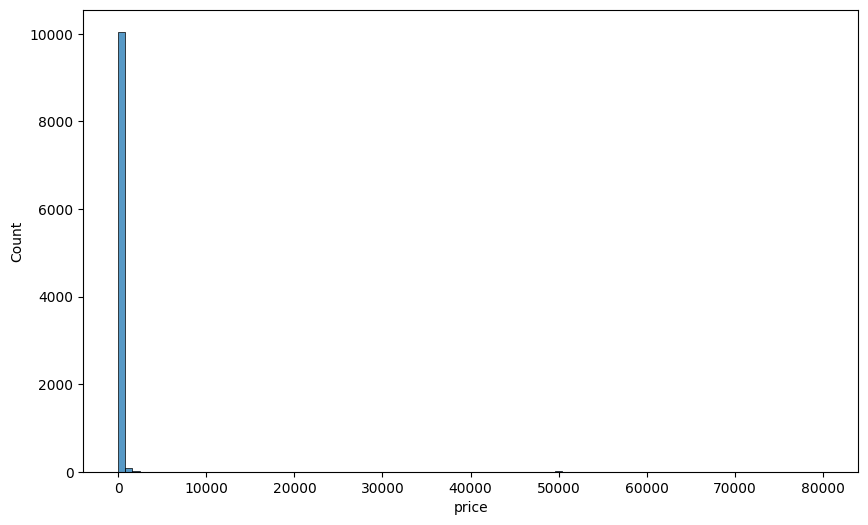

In [ ]:
# buat figure dan axes 
fig, ax = plt.subplots(figsize = (10, 6))

# buat histogram plot price
sns.histplot(data = listings_filtered,
             x = "price",
             bins = 100, 
             ax = ax)

plt.show()

- Terlihat skala dari x axis mencapai 8000.
- Hal ini terjadi karena terdapat data yang nilainya mendekati 8000.
- Hal ini bisa di validasi dengan melihat deskripsi statistik dari kolom price

In [ ]:
# deskripsi statistik dari kolom price
listings_filtered["price"].describe()

count    10168.00000
mean       311.22679
std       1806.01688
min          8.00000
25%        198.00000
50%        223.00000
75%        250.00000
max      80018.00000
Name: price, dtype: float64

- Terlihat nilai maksimum dari kolom price berada di angka 7900.
- Angka ini sangat jauh dibanding nilai Q3 sebesar 264.
- Data di atas Q3 memiliki potensi sebagai outlier
- Kita **asumsikan** memang ada outlier

Masih ingat gambar ini?

<center>
<img src="https://miro.medium.com/max/720/1*0MPDTLn8KoLApoFvI0P2vQ.webp">
<br>
<a href="https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21">source</a>
</center>



- Kita akan tentukan suatu data adalah outlier, apabila nilainya lebih besar dari Q3 + 1.5 IQR

In [ ]:
#  cari Q1 dan Q3
Q1 = listings_filtered.price.quantile(0.25)
Q3 = listings_filtered.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 198.00
Q3 : 250.00


In [ ]:
# cari IQR dan BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR
min_bound = Q1 - 1.5*IQR

min_bound = max(min_bound, 0)

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")
print(f"Minimum Boundary : {min_bound:.2f}")

IQR : 52.00
Maximum Boundary : 328.00
Minimum Boundary : 120.00


In [ ]:
# filter data tanpa outlier
listings_filtered = listings_filtered[listings_filtered['price'] < max_bound]

In [ ]:
# validasi hasil filter
listings_filtered['price'].describe()

count    8748.000000
mean      207.850480
std        51.105032
min         8.000000
25%       183.000000
50%       223.000000
75%       223.000000
max       327.000000
Name: price, dtype: float64

- Terlihat Q3 dan nilai maximum sudah tidak berbeda jauh
- Outlier telah dihilangkan

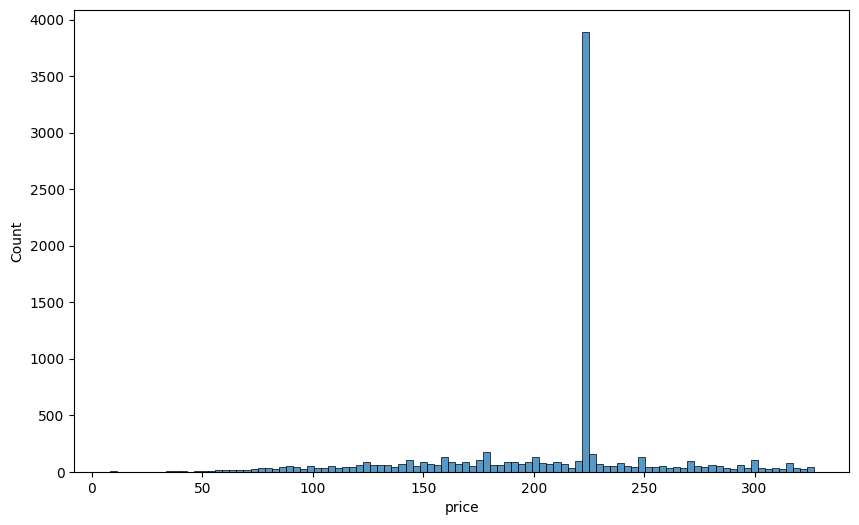

In [ ]:
# buat figure dan axes
fig, ax = plt.subplots(figsize = (10, 6))

# buat histofram plot price
sns.histplot(data = listings_filtered, 
             x = 'price',
             bins = 100, 
             ax = ax)

plt.show()

## Analysis

Dalam studi kasus kali ini kita akan mencari informasi:
1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata review masing masing tipe property

### 1. Jumlah host yang mendaftar dari tahun ke tahun

Untuk melakukan ini kita akan meng-ekstrak data tahun dari data tanggal host_since

In [ ]:
listings_filtered

,id,host_name,host_since,host_response_time,percent_host_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,27886,Flip,2010-03-23 00:00:00,within an hour,100.0,private room,2,1.5,1.0,132.0,302
1,28871,Edwin,2010-05-13 00:00:00,within an hour,100.0,private room,2,1.0,1.0,78.0,710
2,29051,Edwin,2010-05-13 00:00:00,within an hour,100.0,private room,2,1.0,1.0,70.0,822
3,44391,Jan,2010-08-08 00:00:00,within an hour,100.0,entire home/apt,4,1.0,2.0,223.0,42
4,47061,Ivar,2010-08-24 00:00:00,within a few hours,100.0,entire home/apt,3,1.5,2.0,120.0,203
...,...,...,...,...,...,...,...,...,...,...,...
10162,1436896258262505737,Jacqueline,2011-02-18 00:00:00,within an hour,100.0,entire home/apt,3,1.5,2.0,194.0,0
10163,1437492870456891135,Mirte Renée,2025-06-06 00:00:00,within an hour,100.0,entire home/apt,4,1.0,3.0,258.0,0
10165,1437601466510408215,Anna,2016-02-10 00:00:00,within an hour,100.0,entire home/apt,2,1.0,1.0,263.0,0
10166,1437660079651924451,Hedwig,2024-05-06 00:00:00,within a day,80.0,entire home/apt,3,1.0,1.0,300.0,0


In [ ]:
listings_filtered["host_since"].dtypes

dtype('O')

In [ ]:
listings_filtered["year"] = listings_filtered.host_since.dt.year
listings_filtered

AttributeError: Can only use .dt accessor with datetimelike values